In [1]:
import os
import numpy as np
import pandas as pd
import ktrain

In [2]:
ktrain.__version__


'0.39.0'

In [3]:
# pip install ktrain
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html

In [4]:
from sklearn.datasets import fetch_20newsgroups

In [5]:
dir(fetch_20newsgroups)

['__annotations__',
 '__builtins__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [11]:
# from the data we dont want header, footer & quotes
remove = ("headers","footers","quotes")
data_text = fetch_20newsgroups(subset="all", remove = remove)

In [12]:
data_text

{'data': ["\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n",
  'My brother is in the market for a high-performance video card that supports\nVESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:\n\n  - Diamond Stealth Pro Local Bus\n\n  - Orchid Farenheit 1280\n\n  - ATI Graphics Ultra Pro\n\n  - Any othe

In [13]:
# Here we have data description, data, filenames, target data, & target names
dir(data_text)

['DESCR', 'data', 'filenames', 'target', 'target_names']

In [14]:
# data_text.DESCR
# data_text.data
data_text.filenames

array(['C:\\Users\\Admin\\scikit_learn_data\\20news_home\\20news-bydate-test\\rec.sport.hockey\\54367',
       'C:\\Users\\Admin\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.ibm.pc.hardware\\60215',
       'C:\\Users\\Admin\\scikit_learn_data\\20news_home\\20news-bydate-train\\talk.politics.mideast\\76120',
       ...,
       'C:\\Users\\Admin\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.ibm.pc.hardware\\60695',
       'C:\\Users\\Admin\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.graphics\\38319',
       'C:\\Users\\Admin\\scikit_learn_data\\20news_home\\20news-bydate-test\\rec.autos\\103195'],
      dtype='<U95')

In [15]:
data_text.target

array([10,  3, 17, ...,  3,  1,  7])

In [16]:
data_text.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [25]:
targets = data_text.target

In [21]:
type(data_text)

sklearn.utils._bunch.Bunch

In [26]:
len(targets)

18846

In [28]:
len(data_text.data)

18846

In [38]:
texts = data_text.data

In [29]:
# getting the target names for each target
categories = [data_text.target_names[target] for target in targets]

In [31]:
len(categories)

18846

In [32]:
categories[0:5]

['rec.sport.hockey',
 'comp.sys.ibm.pc.hardware',
 'talk.politics.mideast',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware']

In [39]:

# n_features - 10000 most common words in the vocabulary
%time
tm = ktrain.text.get_topic_model(texts, n_features=10000)

CPU times: total: 0 ns
Wall time: 0 ns
n_topics automatically set to 97
lang: en
preprocessing texts...
fitting model...
iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
done.


In [41]:
tm.print_topics()

topic 0 | file files program code display directory ftp set widget version
topic 1 | customer mexico restraint nationalism lawsuit palestineans lazarus palestinean subscription weeks
topic 2 | com bob stay vice sea sig away blew tek manhattan
topic 3 | windows ibm network run microsoft os/2 unix tom development apps
topic 4 | migraine doctor dead people previous armenian according azeri seek oneself
topic 5 | ranging transport tree bottle imposed owns answering said jagr booster
topic 6 | review test battery stuff deleted looked files solution lead file
topic 7 | preference gall carb wine spin barrier talking secondly dpi circa
topic 8 | time like good work group don want just make know
topic 9 | customers fraud filling suspect vision cwru atm regardless contour exchanged
topic 10 | genocide reply-to manipulating police inevitable passed driver god core inning
topic 11 | anytime lance passwords quietly publish capacitor error anonymous wise panther
topic 12 | cable piece warning lock d

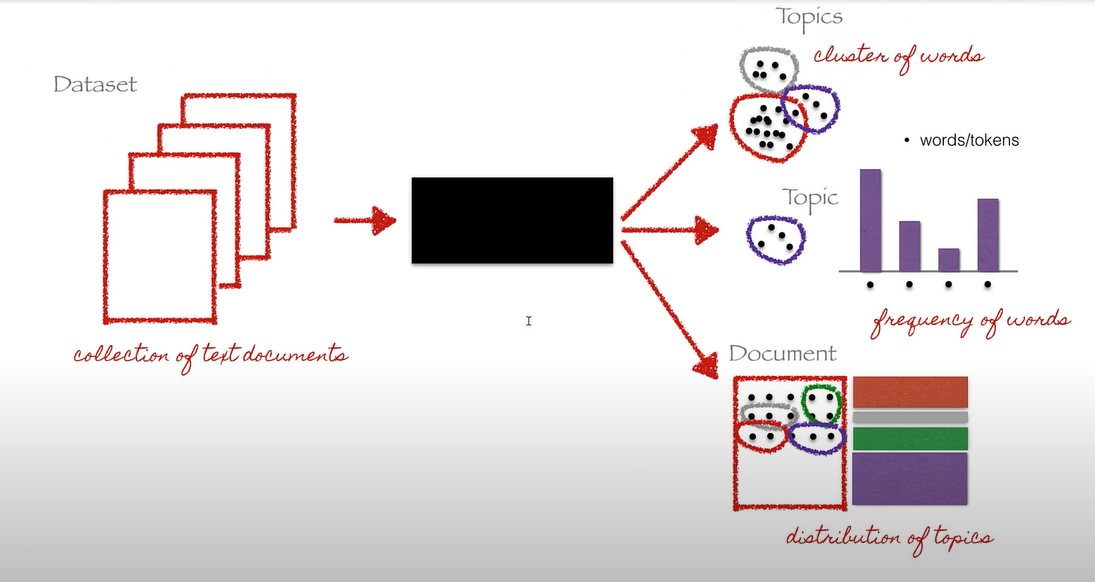

In [ ]:
# System found total of 97 topics from all the text data. & each topic talks about the words given against the topic number
# Eg. words against the topic 1 has the same topics clustered together.